[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Data_Collection.ipynb)

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [6]:

#Getting data from sklearn
from sklearn.datasets import load_iris


iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[14])
print(set(iris.target))

150
150
[5.8 4.  1.2 0.2]
{0, 1, 2}


In [7]:
# downloading data from github

import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
print(len(birth_data))
print(len(birth_data[0]))


189
9


In [8]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file =  requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))
print(housing_data)

ConnectionError: ignored

In [3]:
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[2,:])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

170500096/170498071 [==============================] - 30s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


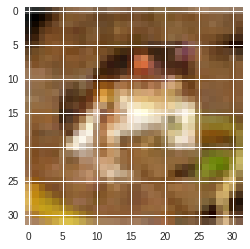

In [9]:
from PIL import Image


(X_train, y_train) ,(X_test,y_test) = tf.contrib.keras.datasets.cifar10.load_data()

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

In [0]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')
# Format Data
text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

In [12]:
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)

streaming_data = io.BytesIO(r.content)
temp = io.BytesIO()

while True:
    s = streaming_data.read(16384)
    if not s:  
        break
    temp.write(s)
streaming_data.close()
temp.seek(0)

# Extract tar file
tar_file = tarfile.open(fileobj=temp, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# Save pos/neg reviews
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(pos_data[0])

5331
5331
the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 



In [19]:

shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'
sp_data = requests.get(shakespeare_url)

sp_file = sp_data.content

sp_text = sp_file.decode('utf-8')
sp_text = sp_text[2308:]
print(len(sp_text))

5587579


In [21]:
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[14])

169813
169813
['I won!', 'Ich hab gewonnen!']
